# Classification with Neural Networkand Adam optimization using Numpy only <br>

Author: jvachier <br>
Creation date: July 2022 <br>
Publication date: July 2022 <br>

My goal is to classify  10  digits from  0  to  9  with Neural Networks using Numpy only. The training set (train.csv) contains  42000  labelled pictures and the testing set (test.csv) contains  28000  non-labelled pictures. Each picture has  784  pixels ( 28×28 ) and is the input size of the network.

The Network is built using two hidden layers using Adam optimization. The first layer contains  128  neurons, the second layer  40  neurons and the output layer  10  neurons.

In this Network, the activation function for the intermediate layers is ReLu and the accuracy is computed. Moreover, the cost function used is the mean squared error (MSE).

This Network is optimized using Adam and compared with another Network without optimization. The learning rate is given by  $\alpha$ .

The Networks are first trained independently on the training set and then tested using the test set. The accuracy reaches  100%  for the Network optimized with Adam.

Reference:

- 'ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION' D.P Kingma and J. Lei Ba https://arxiv.org/pdf/1412.6980.pdf

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from PIL import Image as im
from IPython.display import display 
from matplotlib.pyplot import imshow 
import time

2022-07-12 08:53:37.521067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 08:53:37.521083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Functions

In [2]:
## Activation Functions ##
## ReLu ##
def Relu(x):
    return np.maximum(0,x)
    
def Relu_derive(x):
    return np.where(x <= 0, 0, 1)
    
## Sigmoid ##
def Sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
    
def Sigmoid_deriv(x):
    return Sigmoid(x)*(1.0 - Sigmoid(x))

## Softmax ##
def Softmax(x):
    return np.exp(x)/sum(np.exp(x))

## Cost function ##
def cost(y_data,y_prediction):
    return np.sum((y_data - y_prediction)**2/y_data.size)

def Categrorical_accuracy(output_layer,data): 
    maxarg = lambda x : np.argmax(x)
    yTrue = np.array([maxarg(z) for z in data.T])
    yPred = np.array([maxarg(z) for z in output_layer.T])
    CategoricalAccuracy = sum(yPred == yTrue)/len(yPred)
    return CategoricalAccuracy

## Neural Networks 

### 3 Layers with Softmax with Adam Optimization

In [ ]:
def Layers3_softmax_Adam(n_xtrain,y_train,iterations, learning_rate):
    iterations    = iterations
    learning_rate = learning_rate
    n_neurons_layer1 = 128
    n_neurons_layer2 = 40
    n_neurons_layer3 = 10 # 10 numbers
    
    
    ## initialization ##
    # Random matrix and vector #
    # Layer 1 #
    weights_layer1 = np.random.rand(n_neurons_layer1,n_xtrain) - 0.5 #matrix drwan from uniform distrib - if randn then from Normal distribution
    biases_layer1  = np.random.rand(n_neurons_layer1,1) - 0.5  #vector
    # Layer 2 #
    weights_layer2 = np.random.rand(n_neurons_layer2,n_neurons_layer1)- 0.5  #matrix
    biases_layer2  = np.random.rand(n_neurons_layer2,1) - 0.5  #vector
    # Layer 3 #
    weights_layer3 = np.random.rand(n_neurons_layer3,n_neurons_layer2)- 0.5  #matrix
    biases_layer3  = np.random.rand(n_neurons_layer3,1) - 0.5  #vector
    
    ## Adam optimization ##
    ## WEIGHT ##
    m_now_weight3  = np.zeros((n_neurons_layer3,n_neurons_layer2))
    v_now_weight3  = m_now_weight3
    m_now_weight2  = np.zeros((n_neurons_layer2,n_neurons_layer1))
    v_now_weight2  = m_now_weight2   
    m_now_weight1  = np.zeros((n_neurons_layer1,n_xtrain))
    v_now_weight1  = m_now_weight1
    
    ## BIAS ##
    B_now_bias3    = np.zeros((n_neurons_layer3,1))
    vB_now_bias3   = B_now_bias3      
    B_now_bias2    = np.zeros((n_neurons_layer2,1))
    vB_now_bias2   = B_now_bias2     
    B_now_bias1    = np.zeros((n_neurons_layer1,1))
    vB_now_bias1   = B_now_bias1
    
    accuracy_history_Network3 = []
    sqrt_mse_history_Network3 = []
    r2_score_history_Network3 = []
    Cost_history_Network3     = []
    
    for iters in range(iterations):
        ## Forward Propagation ##
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)
        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Relu(Z_layer2)
        Z_layer3          = weights_layer3 @ activation_layer2 + biases_layer3
        activation_layer3 = Softmax(Z_layer3)
        
        
        ## Backpropagation using Adam Optimization ##    
        beta1   = 0.9
        beta2   = 0.99
        epsilon = 1e-8 
        
        BETA1 = (1.0 - beta1)
        BETA2 = (1.0 - beta2)
        
        invBETA1 = 1.0/BETA1
        invBETA2 = 1.0/BETA2
            
        m_past_weight3 = m_now_weight3
        v_past_weight3 = v_now_weight3
        
        m_past_weight2 = m_now_weight2
        v_past_weight2 = v_now_weight2
        
        m_past_weight1 = m_now_weight1
        v_past_weight1 = v_now_weight1

        B_past_bias3  = B_now_bias3
        vB_past_bias3 = vB_now_bias3
        
        B_past_bias2  = B_now_bias2
        vB_past_bias2 = vB_now_bias2
        
        B_past_bias1  = B_now_bias1
        vB_past_bias1 = vB_now_bias1


        
        ## backward propagation ##
        output_error = activation_layer3 - y_train 
        Layer_2b = (weights_layer3.T @ output_error) * Relu_derive(Z_layer2) 
        Layer_2w = Layer_2b @ activation_layer1.T
        Layer_1b = (weights_layer2.T  @ Layer_2b) * Relu_derive(Z_layer1) 
        Layer_1w = Layer_1b @ x_train_np.T 
    

        ## WEIGHT ##
        m_now_weight3 = beta1*m_past_weight3 + BETA1 * (output_error @ activation_layer2.T) #Layer 3
        m_now_weight2 = beta1*m_past_weight2 + BETA1 * Layer_2w #Layer 2
        m_now_weight1 = beta1*m_past_weight1 + BETA1 * Layer_1w #Layer 1

        v_now_weight3 = beta2*v_past_weight3 + BETA2 * (output_error @ activation_layer2.T)**2 
        v_now_weight2 = beta2*v_past_weight2 + BETA2 * Layer_2w**2
        v_now_weight1 = beta2*v_past_weight1 + BETA2 * Layer_1w**2

        hm_now_weight3 = m_now_weight3 * invBETA1
        hm_now_weight2 = m_now_weight2 * invBETA1
        hm_now_weight1 = m_now_weight1 * invBETA1
        
        hv_now_weight3 = v_now_weight3 * invBETA2
        hv_now_weight2 = v_now_weight2 * invBETA2
        hv_now_weight1 = v_now_weight1 * invBETA2

        
        ## BIAS ##
        B_now_bias3 = beta1*B_past_bias3 + BETA1 * (np.sum(output_error)/len(output_error))
        B_now_bias2 = beta1*B_past_bias2 + BETA1 * (np.sum(Layer_2b)/len(Layer_2b))
        B_now_bias1 = beta1*B_past_bias1 + BETA1 * (np.sum(Layer_1b)/len(Layer_1b))

        vB_now_bias3 = beta2*vB_past_bias3 + BETA2 * (np.sum(output_error)/len(output_error))**2 
        vB_now_bias2 = beta2*vB_past_bias2 + BETA2 * (np.sum(Layer_2b)/len(Layer_2b))**2
        vB_now_bias1 = beta2*vB_past_bias1 + BETA2 * (np.sum(Layer_1b)/len(Layer_1b))**2

        hB_now_bias3 = B_now_bias3 * invBETA1
        hB_now_bias2 = B_now_bias2 * invBETA1
        hB_now_bias1 = B_now_bias1 * invBETA1
        
        hvB_now_bias3 = vB_now_bias3 * invBETA2
        hvB_now_bias2 = vB_now_bias2 * invBETA2
        hvB_now_bias1 = vB_now_bias1 * invBETA2


        correction_weight3 = hm_now_weight3 * (learning_rate/(np.sqrt(hv_now_weight3) + epsilon))
        correction_weight2 = hm_now_weight2 * (learning_rate/(np.sqrt(hv_now_weight2) + epsilon))
        correction_weight1 = hm_now_weight1 * (learning_rate/(np.sqrt(hv_now_weight1) + epsilon))
        
        
        correction_bias3 = hB_now_bias3 * (learning_rate/(np.sqrt(hvB_now_bias3) + epsilon))
        correction_bias2 = hB_now_bias2 * (learning_rate/(np.sqrt(hvB_now_bias2) + epsilon))
        correction_bias1 = hB_now_bias1 * (learning_rate/(np.sqrt(hvB_now_bias1) + epsilon))
        
        # Layer 3 #
        biases_layer3  = biases_layer3  - correction_bias3
        weights_layer3 = weights_layer3 - correction_weight3  
        # Layer 2 #
        weights_layer2 = weights_layer2 - correction_weight2
        biases_layer2  = biases_layer2  - correction_bias2
        # Layer 1 #
        weights_layer1 = weights_layer1 - correction_weight1
        biases_layer1  = biases_layer1  - correction_bias1

        ## accurary ##
        categoricalAccuracy = Categrorical_accuracy(activation_layer3,y_train)

        accuracy_history_Network3.append(categoricalAccuracy)
        sqrt_mse_history_Network3.append(np.sqrt(mean_squared_error(y_train,activation_layer3)))
        r2_score_history_Network3.append(r2_score(y_train,activation_layer3))
        Cost_history_Network3.append(cost(y_train,activation_layer3))


        if iters%100 == 0:
            metric = tf.keras.metrics.CategoricalAccuracy()
            metric.update_state(y_train.T,activation_layer3.T)
            print("Epoch", iters)
            print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,activation_layer3)))
            print("R2 Score: ",r2_score(y_train,activation_layer3))
            print("Cost: ", cost(y_train,activation_layer3))
            print("Categorical Accuracy: ", categoricalAccuracy, " (Keras: ", metric.result().numpy(), ")")
            print("\n")
            
    return Cost_history_Network3, accuracy_history_Network3, sqrt_mse_history_Network3, r2_score_history_Network3, weights_layer1, biases_layer1, weights_layer2, biases_layer2, weights_layer3, biases_layer3

#### Validation Network 3

In [4]:
def Layers3_softmax_Validation(x_train_np,m_ytrain,weights_layer1, biases_layer1, weights_layer2, biases_layer2, weights_layer3, biases_layer3):
    for i in range(10):
        a          = np.random.randint(0,m_ytrain)
        array_test = np.reshape(x_train_np[:,a]*255.0, (28, 28))
        data_test  = im.fromarray(array_test)
        imshow(data_test)
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)

        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Relu(Z_layer2)

        Z_layer3          = weights_layer3 @ activation_layer2 + biases_layer3
        activation_layer3 = Softmax(Z_layer3)
        print("The number is: ", np.argmax(activation_layer3,0)[a])
        plt.show()

### 3 Layers with Softmax without Adam

In [5]:
def Layers3_softmax(n_xtrain,y_train,iterations, learning_rate):
    iterations    = iterations
    learning_rate = learning_rate
    n_neurons_layer1 = 128
    n_neurons_layer2 = 40
    n_neurons_layer3 = 10 # 10 numbers
    
    
    ## initialization ##
    # Random matrix and vector #
    # Layer 1 #
    weights_layer1 = np.random.rand(n_neurons_layer1,n_xtrain) - 0.5 #matrix drwan from uniform distrib - if randn then from Normal distribution
    biases_layer1  = np.random.rand(n_neurons_layer1,1) - 0.5  #vector
    # Layer 2 #
    weights_layer2 = np.random.rand(n_neurons_layer2,n_neurons_layer1)- 0.5  #matrix
    biases_layer2  = np.random.rand(n_neurons_layer2,1) - 0.5  #vector
    # Layer 3 #
    weights_layer3 = np.random.rand(n_neurons_layer3,n_neurons_layer2)- 0.5  #matrix
    biases_layer3  = np.random.rand(n_neurons_layer3,1) - 0.5  #vector
    
    
    
    accuracy_history_Network3 = []
    sqrt_mse_history_Network3 = []
    r2_score_history_Network3 = []
    Cost_history_Network3     = []
    
    for j in range(iterations):
        ## Forward Propagation ##
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)
        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Relu(Z_layer2)
        Z_layer3          = weights_layer3 @ activation_layer2 + biases_layer3
        activation_layer3 = Softmax(Z_layer3)
             
        
       
        ## backward propagation ##
        MSE      = activation_layer3 - y_train 
        Layer_2b = (weights_layer3.T @ MSE) * Relu_derive(Z_layer2) 
        Layer_2w = Layer_2b @ activation_layer1.T
        Layer_1b = (weights_layer2.T  @ Layer_2b) * Relu_derive(Z_layer1) 
        Layer_1w = Layer_1b @ x_train_np.T 

        
        ## BIAS ##
        # Layer 3 #
        biases_layer3  = biases_layer3 - learning_rate* (np.sum(MSE)/len(MSE))
        weights_layer3 = weights_layer3 - learning_rate*(MSE @ activation_layer2.T)  
        # Layer 2 #
        weights_layer2 = weights_layer2 - learning_rate * Layer_2w
        biases_layer2  = biases_layer2 - learning_rate * (np.sum(Layer_2b)/len(Layer_2b))
        # Layer 1 #
        weights_layer1 = weights_layer1 - learning_rate * Layer_1w
        biases_layer1  = biases_layer1 - learning_rate * (np.sum(Layer_1b)/len(Layer_1b))
   

        ## accurary ##
        categoricalAccuracy = Categrorical_accuracy(activation_layer3,y_train)

        accuracy_history_Network3.append(categoricalAccuracy)
        sqrt_mse_history_Network3.append(np.sqrt(mean_squared_error(y_train,activation_layer3)))
        r2_score_history_Network3.append(r2_score(y_train,activation_layer3))
        Cost_history_Network3.append(cost(y_train,activation_layer3))


        if j%100 == 0:
            metric = tf.keras.metrics.CategoricalAccuracy()
            metric.update_state(y_train.T,activation_layer3.T)
            print("Epoch", j)
            print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,activation_layer3)))
            print("R2 Score: ",r2_score(y_train,activation_layer3))
            print("Cost: ", cost(y_train,activation_layer3))
            print("Categorical Accuracy: ", categoricalAccuracy, " (Keras: ", metric.result().numpy(), ")")
            print("\n")
            
    return Cost_history_Network3, accuracy_history_Network3, sqrt_mse_history_Network3, r2_score_history_Network3, weights_layer1, biases_layer1, weights_layer2, biases_layer2, weights_layer3, biases_layer3

## Data importation

In [6]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [7]:
df_train.head() #there are labels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.head() # there are no labels here

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train = df_train.T
df_test  = df_test.T

## Training 

In [10]:
label      = df_train.iloc[0,:] #get the label
x_train    = df_train.iloc[1:,:]/255 #normalization
x_train_np = x_train.to_numpy()
y_train = label.to_numpy()
y_train = to_categorical(y_train, num_classes=10)
y_train = y_train.T
print(x_train_np.shape,y_train.shape)

(784, 42000) (10, 42000)


In [11]:
n_xtrain, m_xtrain = x_train_np.shape
n_ytrain, m_ytrain = y_train.shape

### Neural Network 3: 3 Layers with Softmax Adam function 

In [12]:
Cost_history_Network3, accuracy_history_Network3, sqrt_mse_history_Network3, r2_score_history_Network3, weights_layer1_Network3, biases_layer1_Network3, weights_layer2_Network3, biases_layer2_Network3, weights_layer3_Network3, biases_layer3_Network3 = Layers3_softmax_Adam(n_xtrain,y_train,1001,1E-2)

2022-07-12 08:53:45.812791: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-12 08:53:45.812857: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jeremy-Precision-3551): /proc/driver/nvidia/version does not exist
2022-07-12 08:53:45.814180: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 0
Root Mean Squared Error:  0.3942317072393394
R2 Score:  -0.726873864155939
Cost:  0.15541863899284422
Categorical Accuracy:  0.12007142857142857  (Keras:  0.120071426 )


Epoch 100
Root Mean Squared Error:  0.079607536257443
R2 Score:  0.9295848868106396
Cost:  0.006337359828980104
Categorical Accuracy:  0.9582380952380952  (Keras:  0.9582381 )


Epoch 200
Root Mean Squared Error:  0.054580882698378616
R2 Score:  0.9668991897283058
Cost:  0.002979072756134165
Categorical Accuracy:  0.9818809523809524  (Keras:  0.98188096 )


Epoch 300
Root Mean Squared Error:  0.033878510212184056
R2 Score:  0.9872471831217178
Cost:  0.001147753454197059
Categorical Accuracy:  0.9938333333333333  (Keras:  0.99383336 )


Epoch 400
Root Mean Squared Error:  0.016887703165067842
R2 Score:  0.9968311718410557
Cost:  0.0002851945181914425
Categorical Accuracy:  0.9989047619047619  (Keras:  0.99890476 )


Epoch 500
Root Mean Squared Error:  0.0060449568703195115
R2 Score:  0.9995939832707932
Cost:  3

#### Validation Network 3

The number is:  9


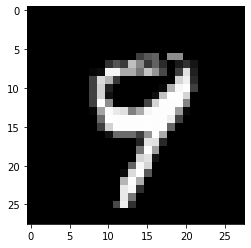

The number is:  2


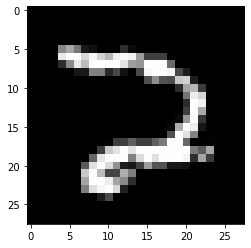

The number is:  5


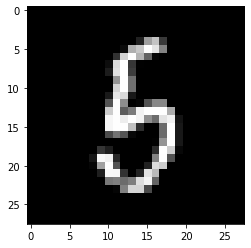

The number is:  8


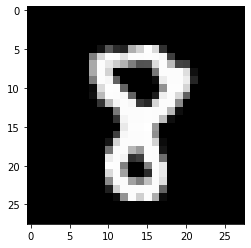

The number is:  5


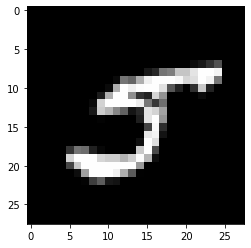

The number is:  4


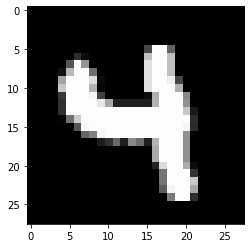

The number is:  6


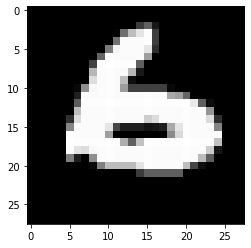

The number is:  7


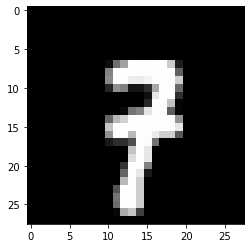

The number is:  7


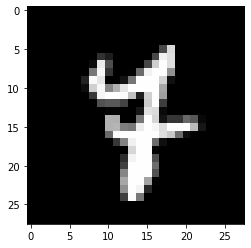

The number is:  6


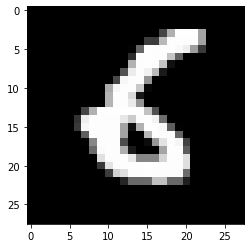

In [13]:
Layers3_softmax_Validation(x_train_np,m_ytrain,weights_layer1_Network3, biases_layer1_Network3, weights_layer2_Network3, biases_layer2_Network3, weights_layer3_Network3, biases_layer3_Network3)

### Neural Network 3: 3 Layers with Softmax function 

In [14]:
Cost_history_Network3_1, accuracy_history_Network3_1, sqrt_mse_history_Network3_1, r2_score_history_Network3_1, weights_layer1_Network3_1, biases_layer1_Network3_1, weights_layer2_Network3_1, biases_layer2_Network3_1, weights_layer3_Network3_1, biases_layer3_Network3_1 = Layers3_softmax(n_xtrain,y_train,1001,1E-5) 

Epoch 0
Root Mean Squared Error:  0.392691941455126
R2 Score:  -0.7134107732947366
Cost:  0.15420696088379615
Categorical Accuracy:  0.08045238095238096  (Keras:  0.08045238 )


Epoch 100
Root Mean Squared Error:  0.16853525886735585
R2 Score:  0.6843984990408112
Cost:  0.028404133481486644
Categorical Accuracy:  0.7986666666666666  (Keras:  0.79866666 )


Epoch 200
Root Mean Squared Error:  0.12510625348701335
R2 Score:  0.8260936050458383
Cost:  0.015651574661556842
Categorical Accuracy:  0.8931666666666667  (Keras:  0.89316666 )


Epoch 300
Root Mean Squared Error:  0.11020849292964359
R2 Score:  0.8650454155547751
Cost:  0.0121459119138233
Categorical Accuracy:  0.9187380952380952  (Keras:  0.91873807 )


Epoch 400
Root Mean Squared Error:  0.10159525190026393
R2 Score:  0.8853156023127702
Cost:  0.010321595208678081
Categorical Accuracy:  0.9312857142857143  (Keras:  0.93128574 )


Epoch 500
Root Mean Squared Error:  0.09867082753487524
R2 Score:  0.8918229693722266
Cost:  0.00973

### Ploting Results

In [15]:
plt.rcParams["figure.figsize"] = (15,10)

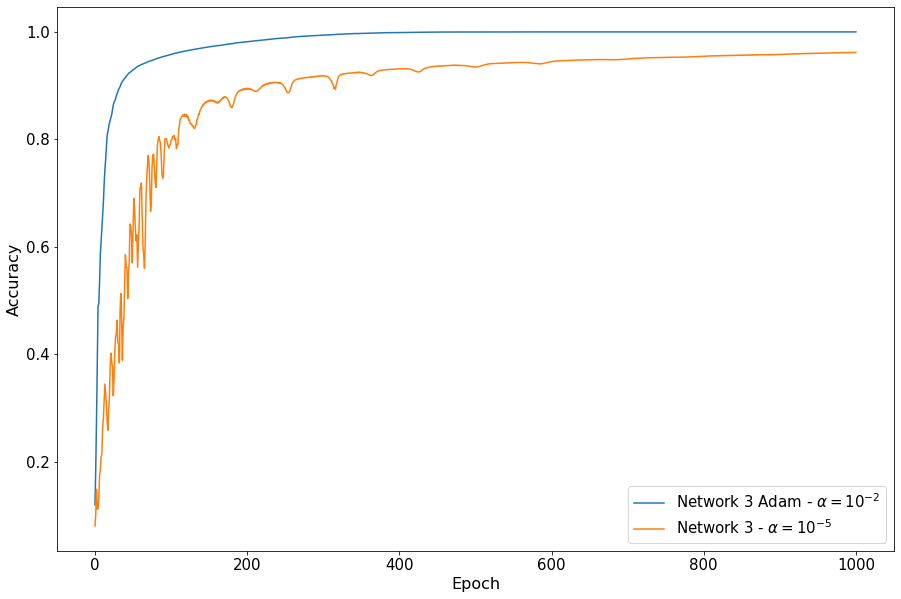

In [16]:
plt.plot(accuracy_history_Network3, label="Network 3 Adam - $\\alpha = 10^{-2}$")
plt.plot(accuracy_history_Network3_1, label="Network 3 - $\\alpha = 10^{-5}$")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

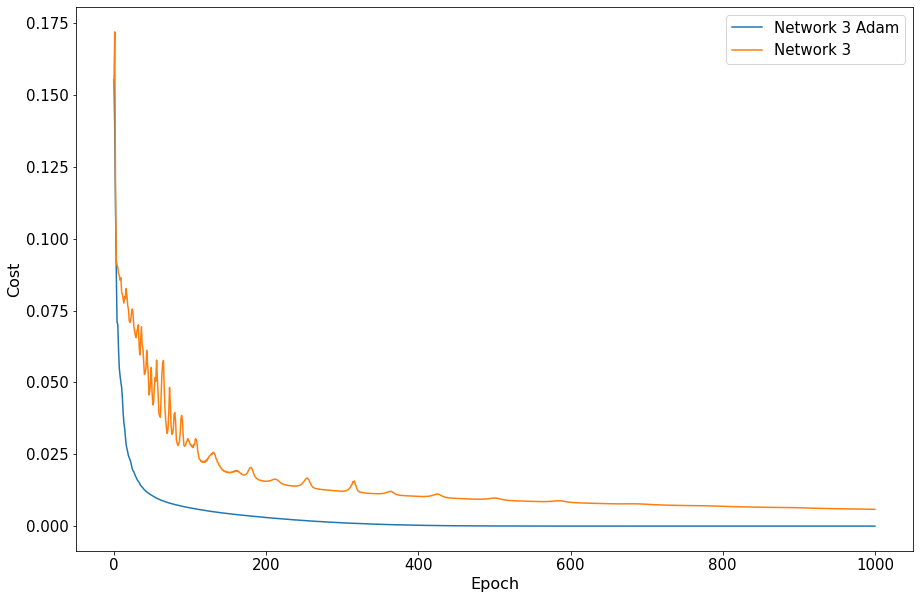

In [17]:
plt.plot(Cost_history_Network3, label="Network 3 Adam")
plt.plot(Cost_history_Network3_1, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Cost",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

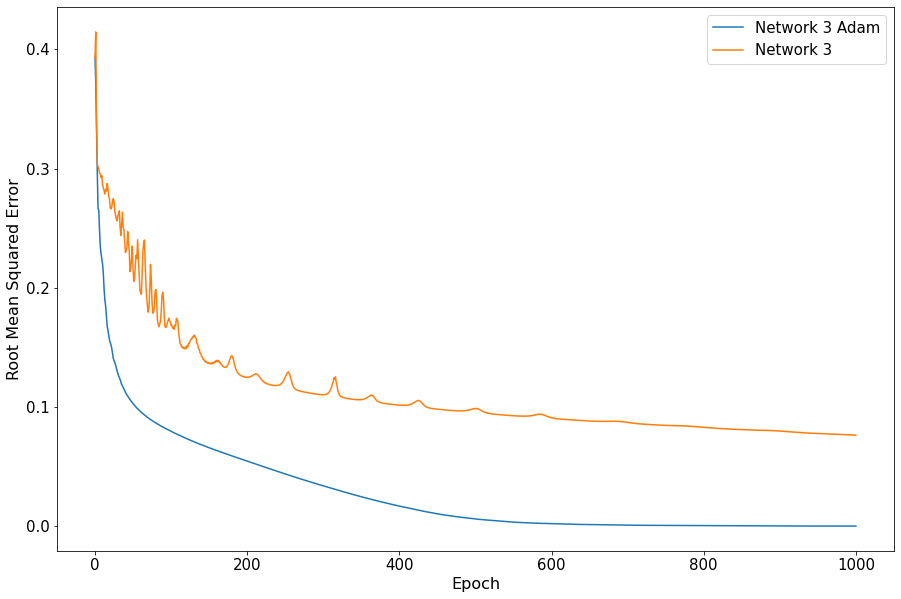

In [18]:
plt.plot(sqrt_mse_history_Network3, label="Network 3 Adam")
plt.plot(sqrt_mse_history_Network3_1, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Root Mean Squared Error",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

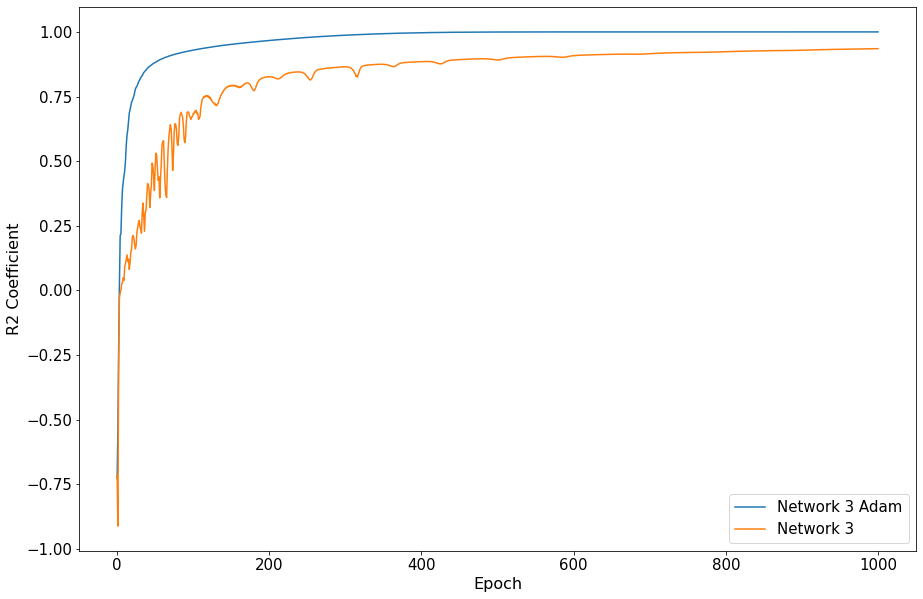

In [19]:
plt.plot(r2_score_history_Network3, label="Network 3 Adam")
plt.plot(r2_score_history_Network3_1, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("R2 Coefficient",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

## Testing 

In [20]:
x_test         = df_test/255.
x_test_np      = x_test.to_numpy()
n_test, m_test = x_test_np.shape
print(n_test,m_test)

784 28000


### Network 3

The number is:  [6]


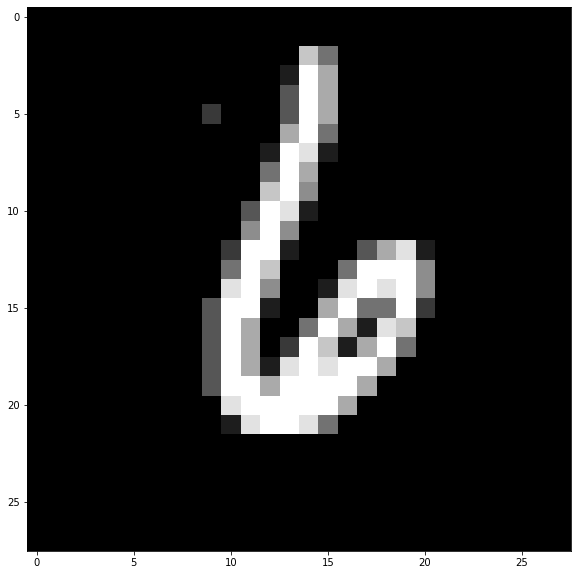

The number is:  [5]


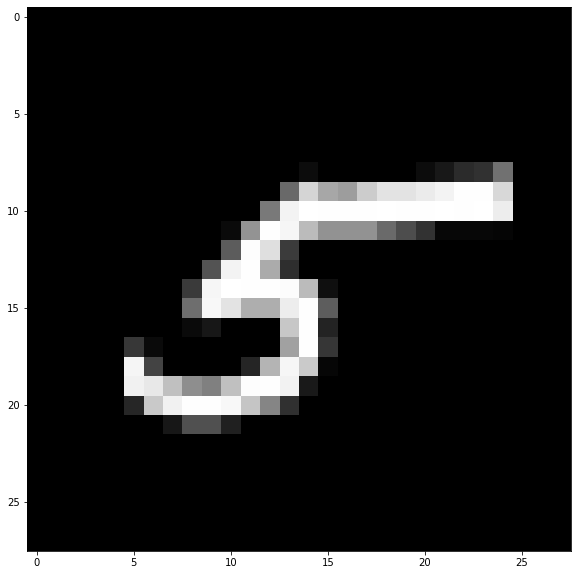

The number is:  [5]


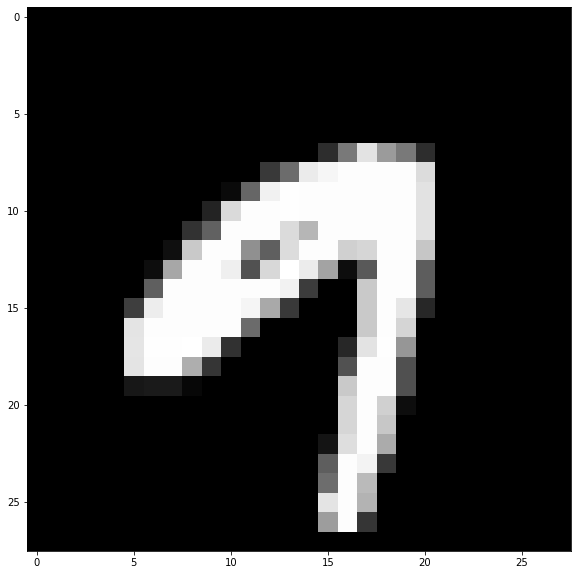

The number is:  [6]


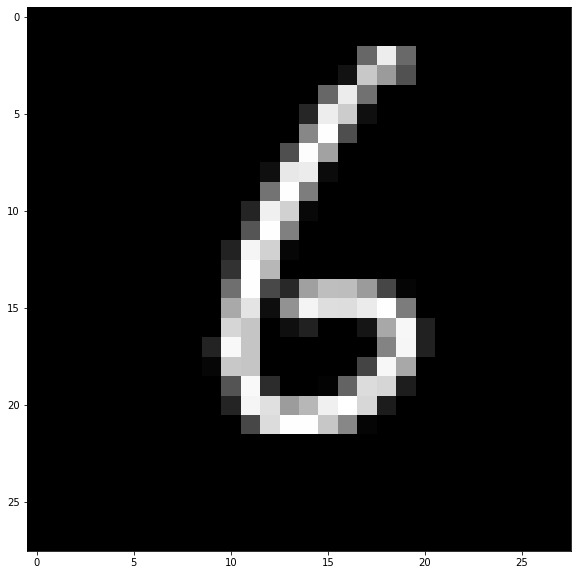

The number is:  [6]


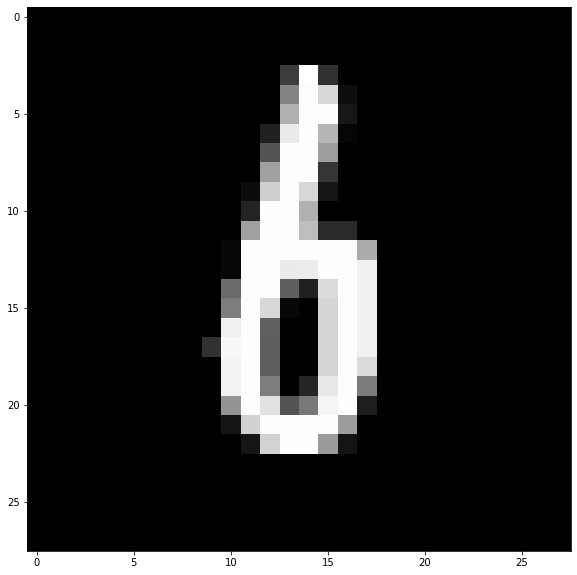

The number is:  [8]


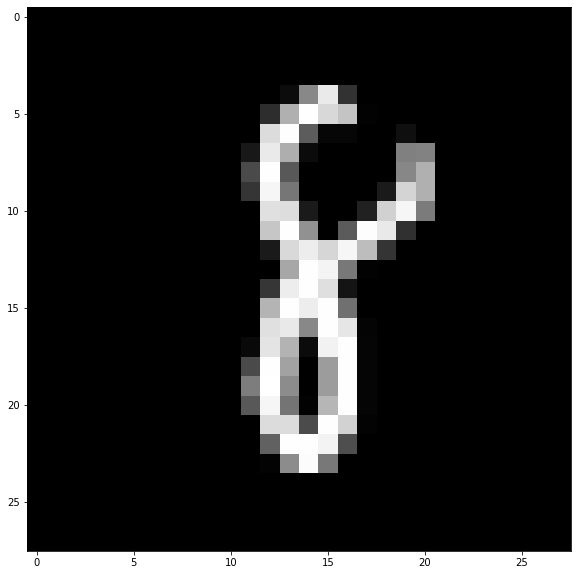

The number is:  [9]


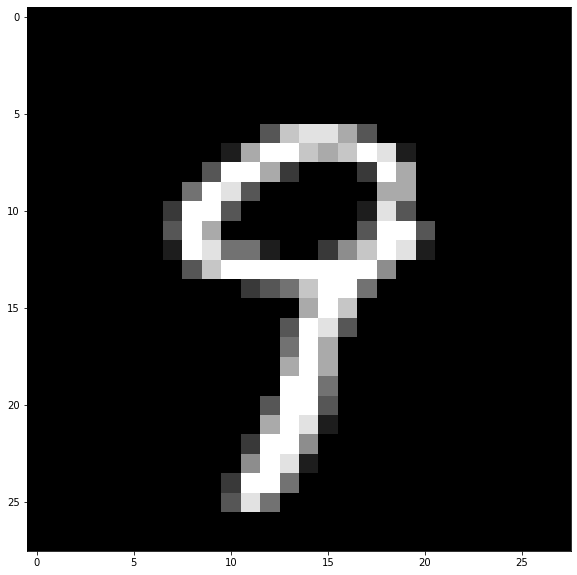

The number is:  [8]


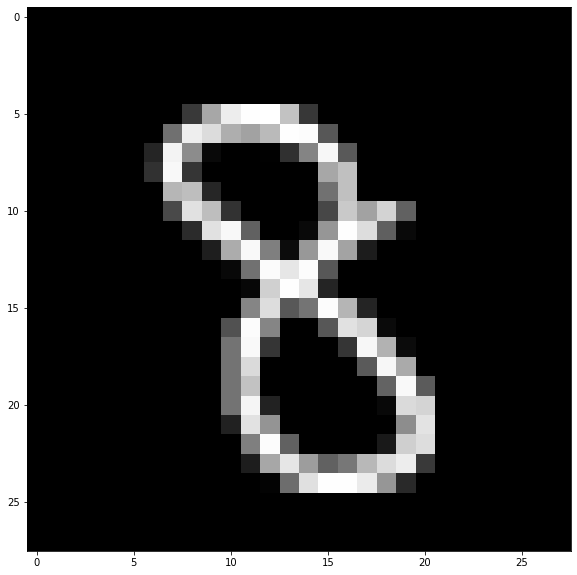

The number is:  [9]


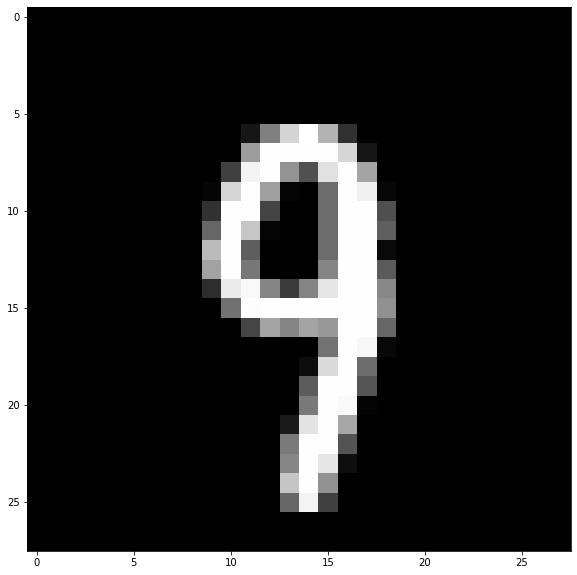

The number is:  [1]


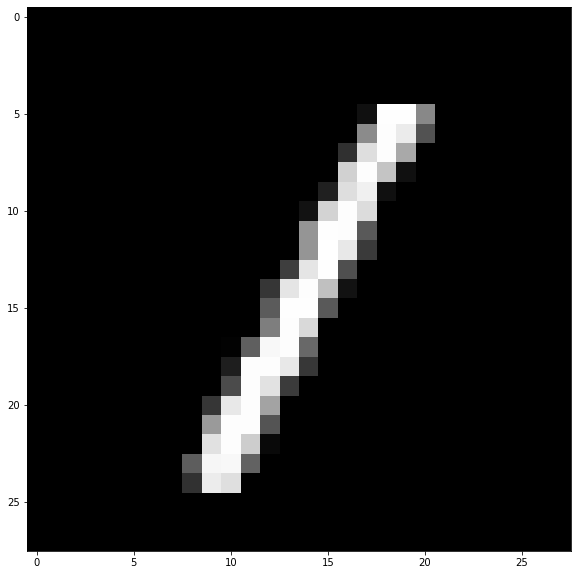

In [21]:
for i in range(10):
    a          = np.random.randint(0,m_test)
    array_test = np.reshape(x_test_np[:,a]*255.0, (28, 28))
    data_test  = im.fromarray(array_test)
    imshow(data_test)
    Z_layer1          = weights_layer1_Network3 @ x_test_np[:,a,None] + biases_layer1_Network3
    activation_layer1 = Relu(Z_layer1)
    
    Z_layer2          = weights_layer2_Network3 @ activation_layer1 + biases_layer2_Network3
    activation_layer2 = Relu(Z_layer2)
    
    Z_layer3          = weights_layer3_Network3 @ activation_layer2 + biases_layer3_Network3
    activation_layer3 = Softmax(Z_layer3)
    print("The number is: ", np.argmax(activation_layer3,0))

    plt.show()

# Prediction

In [22]:
ImageId = []
Label   = []
for i in range(m_test):
    Z_layer1          = weights_layer1_Network3 @ x_test_np[:,i,None] + biases_layer1_Network3
    activation_layer1 = Relu(Z_layer1)
    
    Z_layer2          = weights_layer2_Network3 @ activation_layer1 + biases_layer2_Network3
    activation_layer2 = Relu(Z_layer2)
    
    Z_layer3          = weights_layer3_Network3 @ activation_layer2 + biases_layer3_Network3
    activation_layer3 = Softmax(Z_layer3)
    
    ImageId.append(i)
    Label.append(np.argmax(activation_layer3,0))

In [23]:
ImageId_array = np.asarray(ImageId)
Label_array   = np.asarray(Label).reshape(-1)
print(ImageId_array.shape,Label_array.shape)

(28000,) (28000,)


In [24]:
Prediction_dataframe = pd.DataFrame({'ImageId': ImageId_array + 1, 'Label': Label_array})
Prediction_dataframe.to_csv('prediction_digits_adam.csv',index = False)

The number is:  [2]


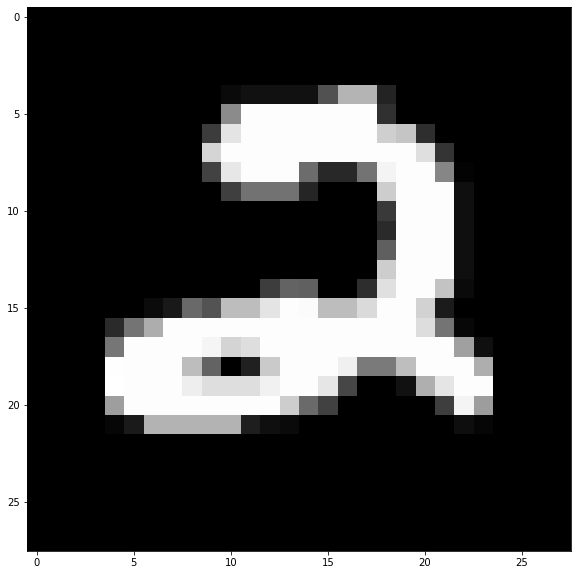

The number is:  [0]


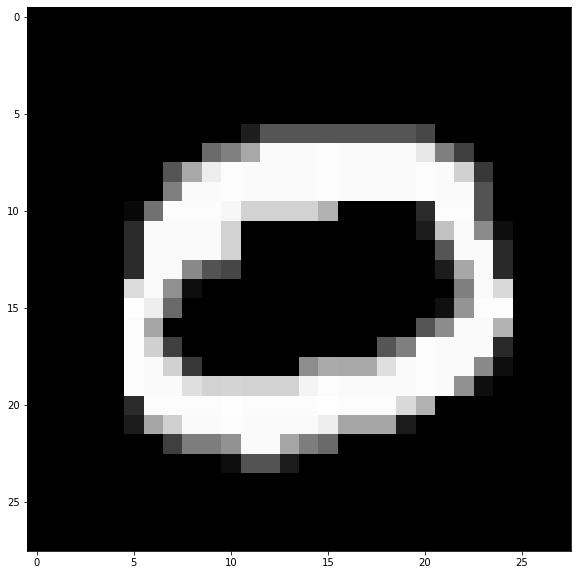

The number is:  [9]


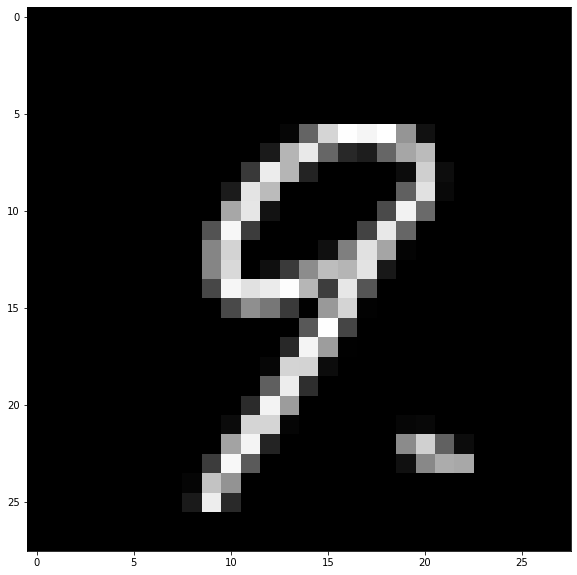

The number is:  [4]


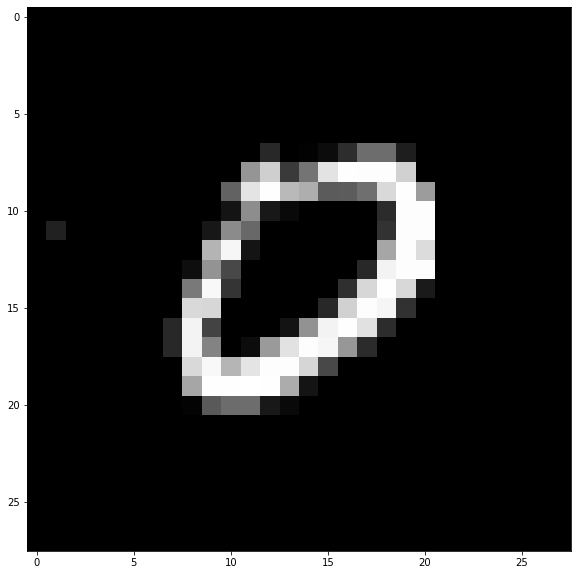

The number is:  [3]


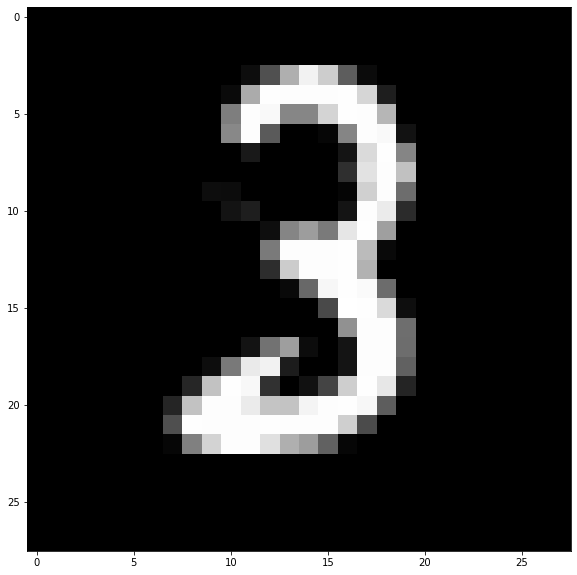

The number is:  [7]


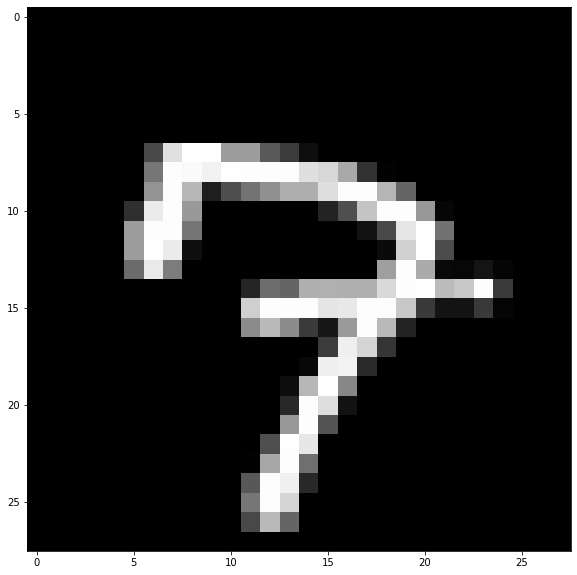

The number is:  [0]


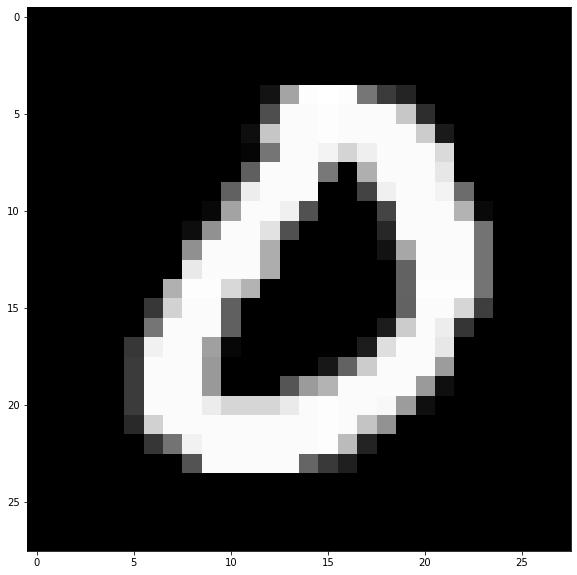

The number is:  [3]


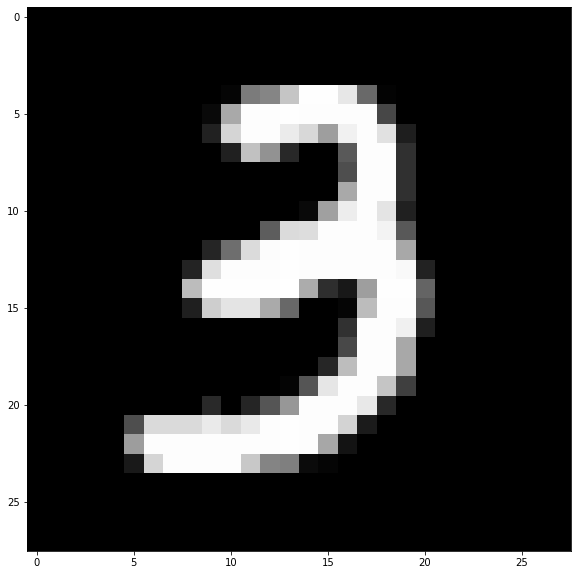

The number is:  [0]


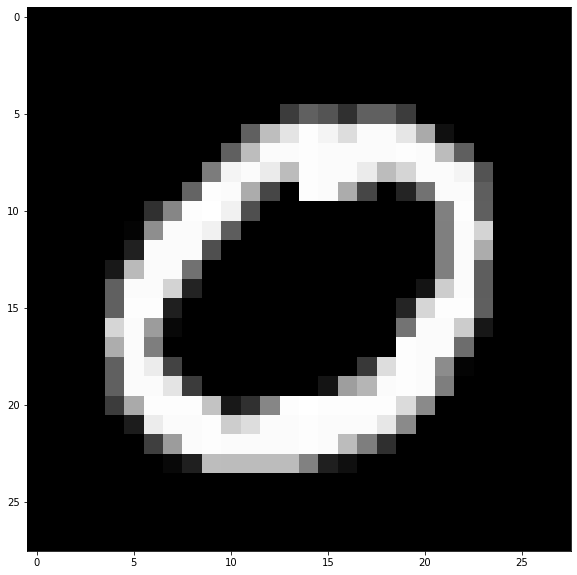

The number is:  [3]


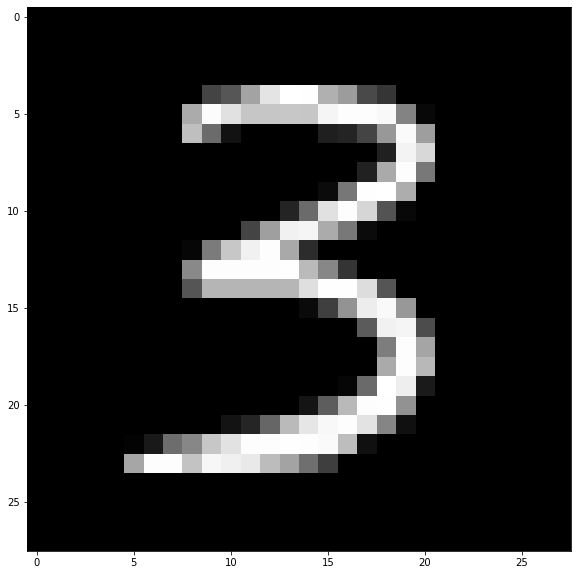

In [26]:
for i in range(10):    
    array_test = np.reshape(x_test_np[:,i]*255.0, (28, 28))
    data_test  = im.fromarray(array_test)
    imshow(data_test)
    Z_layer1          = weights_layer1_Network3 @ x_test_np[:,i,None] + biases_layer1_Network3
    activation_layer1 = Relu(Z_layer1)

    Z_layer2          = weights_layer2_Network3 @ activation_layer1 + biases_layer2_Network3
    activation_layer2 = Relu(Z_layer2)

    Z_layer3          = weights_layer3_Network3 @ activation_layer2 + biases_layer3_Network3
    activation_layer3 = Softmax(Z_layer3)
    print("The number is: ", np.argmax(activation_layer3,0))

    plt.show()